In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import MarkerCluster

In [2]:
lis = pd.read_csv('listings.csv')

In [3]:
lis.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [4]:
columns_to_keep = ['last_scraped','name','host_id','host_name','host_location','neighbourhood','neighbourhood_group_cleansed','city','latitude','longitude','property_type','room_type','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','security_deposit','cleaning_fee','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_location','reviews_per_month']
lis = lis[columns_to_keep]

In [5]:
lis.fillna({'host_name':'absent','host_location':'Not Specified','neighbourhood':'Not Specified','neighbourhood_group_cleansed':'Not Specified','property_type':'Other','weekly_price':'0','monthly_price':'0','security_deposit':'0','cleaning_fee':'0'}, inplace=True)


In [6]:
lis.fillna({'bathrooms':lis['bathrooms'].mean(),'bedrooms':lis['bedrooms'].mean(),'beds':lis['beds'].mean(),'reviews_per_month':0,'review_scores_location':lis['review_scores_location'].mean()},inplace=True)

In [7]:
# changing DataTypes of some columns for better Analysis.

lis['last_scraped'] = pd.to_datetime(lis['last_scraped'])

lis['price'] = lis['price'].str.replace('[^\d.]', '', regex=True)
lis['price'] = pd.to_numeric(lis['price'], errors='coerce')
lis['price'] = lis['price'].astype('Int64')

lis['weekly_price'] = lis['weekly_price'].str.replace('[^\d.]', '', regex=True)
lis['weekly_price'] = pd.to_numeric(lis['weekly_price'], errors='coerce')
lis['weekly_price'] = lis['weekly_price'].astype('Int64')

lis['monthly_price'] = lis['monthly_price'].str.replace('[^\d.]', '', regex=True)
lis['monthly_price'] = pd.to_numeric(lis['monthly_price'], errors='coerce')
lis['monthly_price'] = lis['monthly_price'].astype('Int64')

lis['security_deposit'] = lis['security_deposit'].str.replace('[^\d.]', '', regex=True)
lis['security_deposit'] = pd.to_numeric(lis['security_deposit'], errors='coerce')
lis['security_deposit'] = lis['security_deposit'].astype('Int64')

lis['cleaning_fee'] = lis['cleaning_fee'].str.replace('[^\d.]', '', regex=True)
lis['cleaning_fee'] = pd.to_numeric(lis['cleaning_fee'], errors='coerce')
lis['cleaning_fee'] = lis['cleaning_fee'].astype('Int64')


In [8]:
import folium
from folium.plugins import MarkerCluster

# Extract top 10 hosts by price
top_hosts = lis.groupby('host_name')['price'].mean().nlargest(10).index.tolist()

# Filter listings by top hosts
top_listings = lis[lis['host_name'].isin(top_hosts)]

# Create a folium map centered around the mean latitude and longitude
m = folium.Map(location=[top_listings['latitude'].mean(), top_listings['longitude'].mean()], zoom_start=10)

# Add title to the map
title_html = '<h3 align="center" style="font-size:20px"><b>Top 10 Hosts Map</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add markers for each location with host names as popups
marker_cluster = MarkerCluster().add_to(m)
for idx, row in top_listings.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=row['host_name']).add_to(marker_cluster)

# Display the map
m.save('top_hosts_map.html')
m


In [9]:
import plotly.graph_objs as go

# Get the top 10 neighbourhoods by average price
top_10_neighbourhoods = lis.groupby('neighbourhood')['price'].mean().nlargest(10).index.tolist()

# Filter data for the top 10 neighbourhoods
top_10_data = lis[lis['neighbourhood'].isin(top_10_neighbourhoods)]

# Aggregate data to find mean latitude and longitude for each neighbourhood
neighbourhood_coordinates = top_10_data.groupby('neighbourhood')[['latitude', 'longitude']].mean().reset_index()

# Define data for the 3D globe
globe_data = go.Scattergeo(
    lon=neighbourhood_coordinates['longitude'],
    lat=neighbourhood_coordinates['latitude'],
    text=neighbourhood_coordinates['neighbourhood'],  # Use neighbourhood names as hover text
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,
        color='blue'
    )
)

# Create layout for the 3D globe
globe_layout = go.Layout(
    title='3D Globe Visualization of Top 10 Neighbourhoods by Average Price',
    geo=dict(
        projection_type='orthographic',  # Change projection type for a 3D globe
        showland=True,
        showcountries=True
    ),
    width=800,
    height=600
)

# Create figure and plot the 3D globe
fig = go.Figure(data=[globe_data], layout=globe_layout)
fig.show()


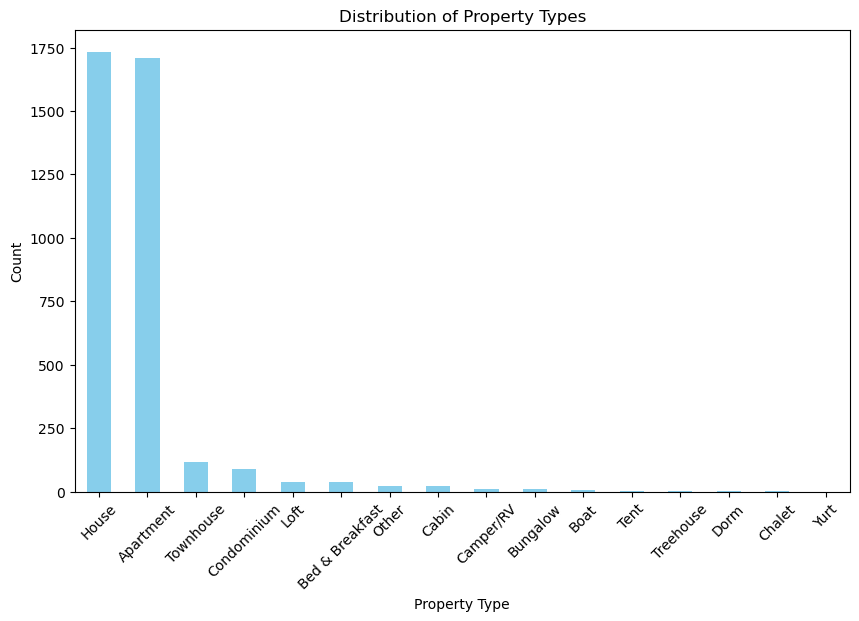

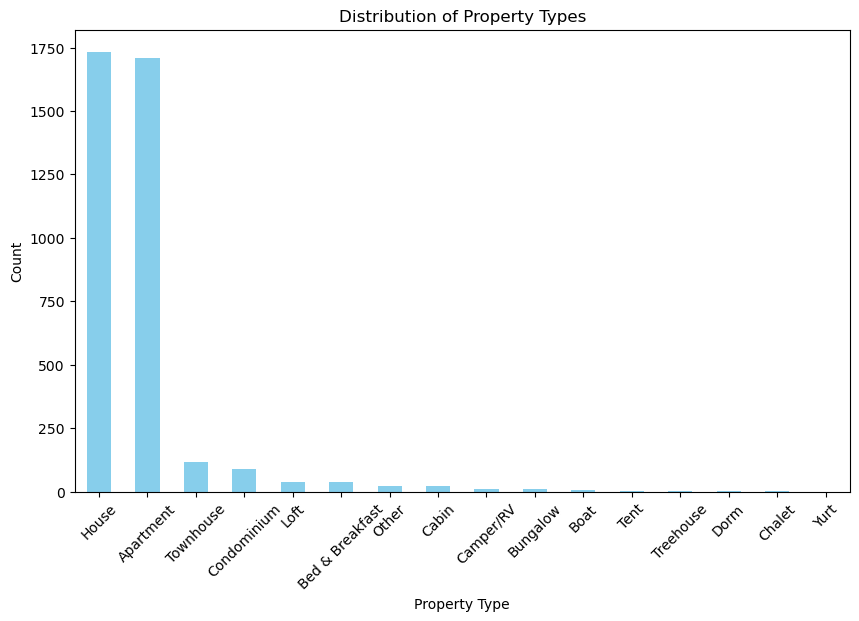

In [10]:
import matplotlib.pyplot as plt

# Count of each property type
property_type_counts = lis['property_type'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
property_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.xticks(rotation=45)
plt.show()


In [11]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   last_scraped                  3818 non-null   datetime64[ns]
 1   name                          3818 non-null   object        
 2   host_id                       3818 non-null   int64         
 3   host_name                     3818 non-null   object        
 4   host_location                 3818 non-null   object        
 5   neighbourhood                 3818 non-null   object        
 6   neighbourhood_group_cleansed  3818 non-null   object        
 7   city                          3818 non-null   object        
 8   latitude                      3818 non-null   float64       
 9   longitude                     3818 non-null   float64       
 10  property_type                 3818 non-null   object        
 11  room_type                     

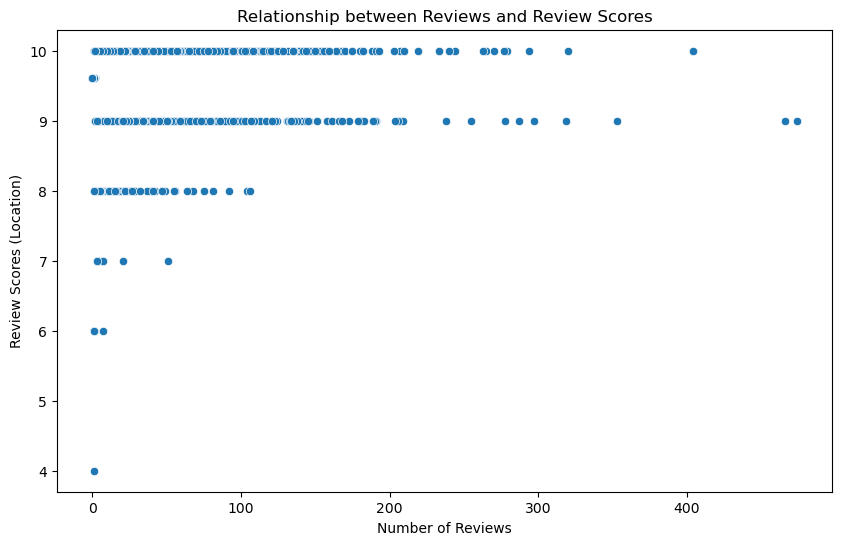

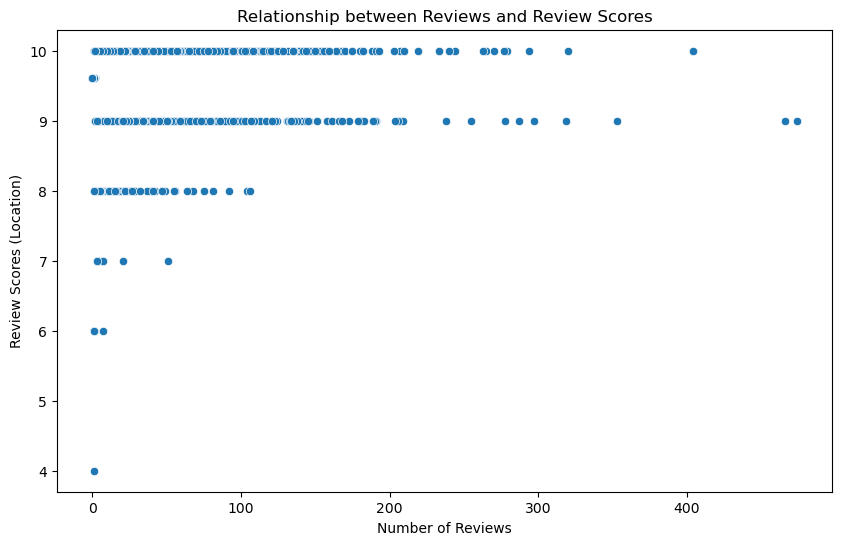

In [12]:
# Plotting reviews vs. review scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='review_scores_location', data=lis)
plt.xlabel('Number of Reviews')
plt.ylabel('Review Scores (Location)')
plt.title('Relationship between Reviews and Review Scores')
plt.show()


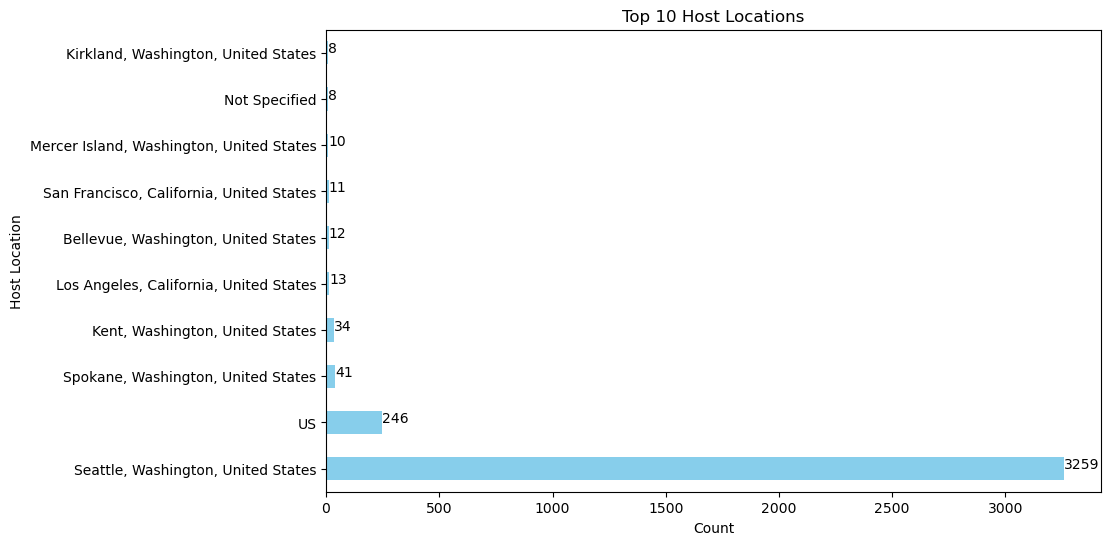

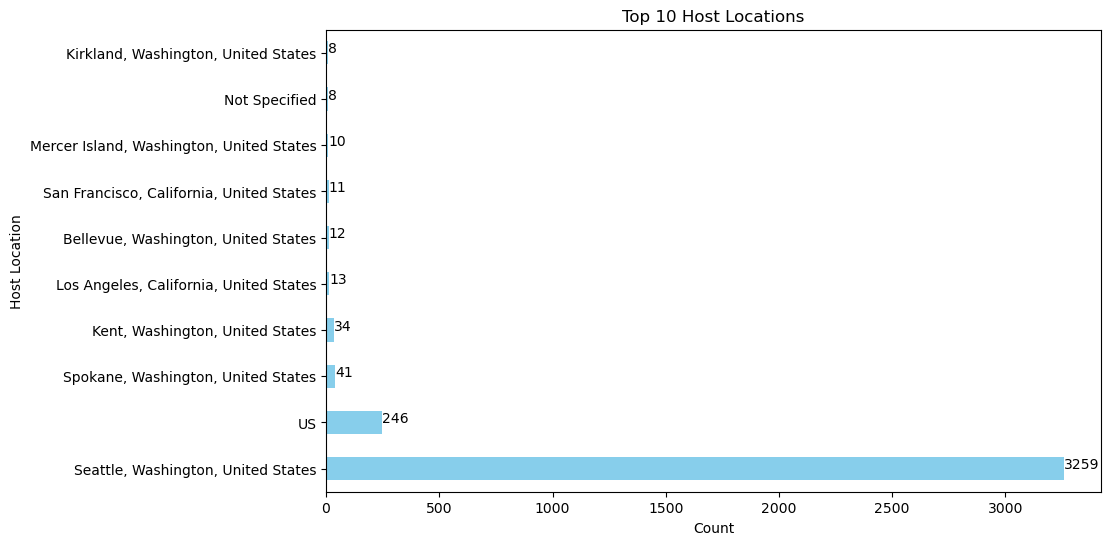

In [13]:
import matplotlib.pyplot as plt

# Count of hosts by location
host_location_counts = lis['host_location'].value_counts().head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = host_location_counts.plot(kind='barh', color='skyblue')  # Use kind='barh' for horizontal bar chart
plt.xlabel('Count')  # Change xlabel to represent the count
plt.ylabel('Host Location')  # Change ylabel to represent the host location
plt.title('Top 10 Host Locations')

# Annotate each bar with its count
for index, value in enumerate(host_location_counts):
    plt.text(value, index, str(value))

plt.show()


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from current font.

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from current font.

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.



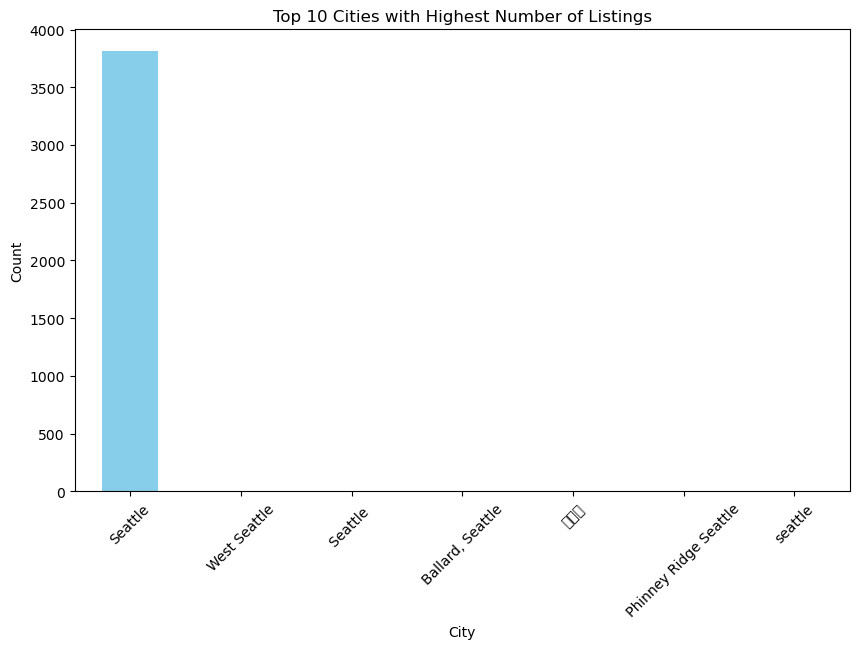

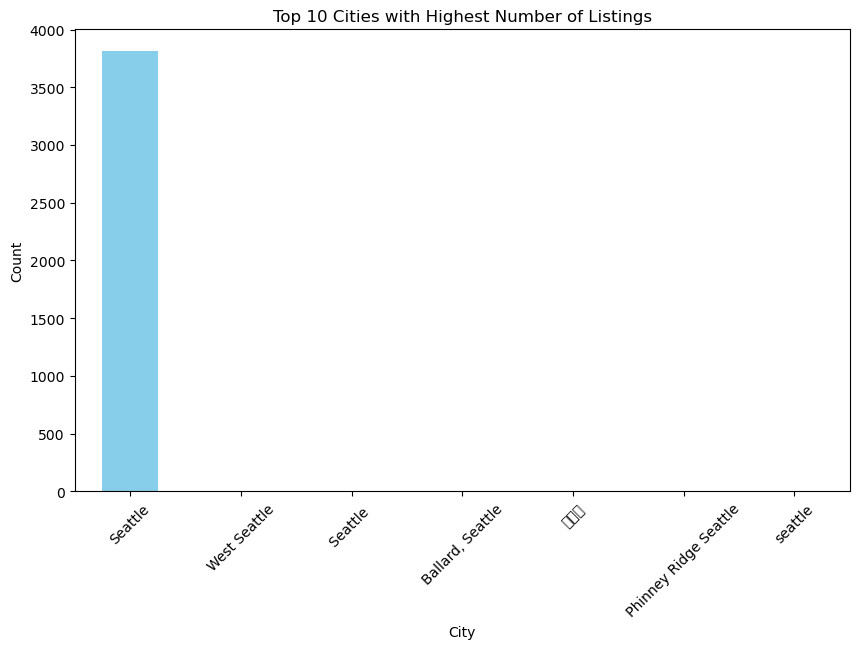

In [14]:
import matplotlib.pyplot as plt

# Count of listings by city
city_counts = lis['city'].value_counts().head(10)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top 10 Cities with Highest Number of Listings')
plt.xticks(rotation=45)
plt.show()


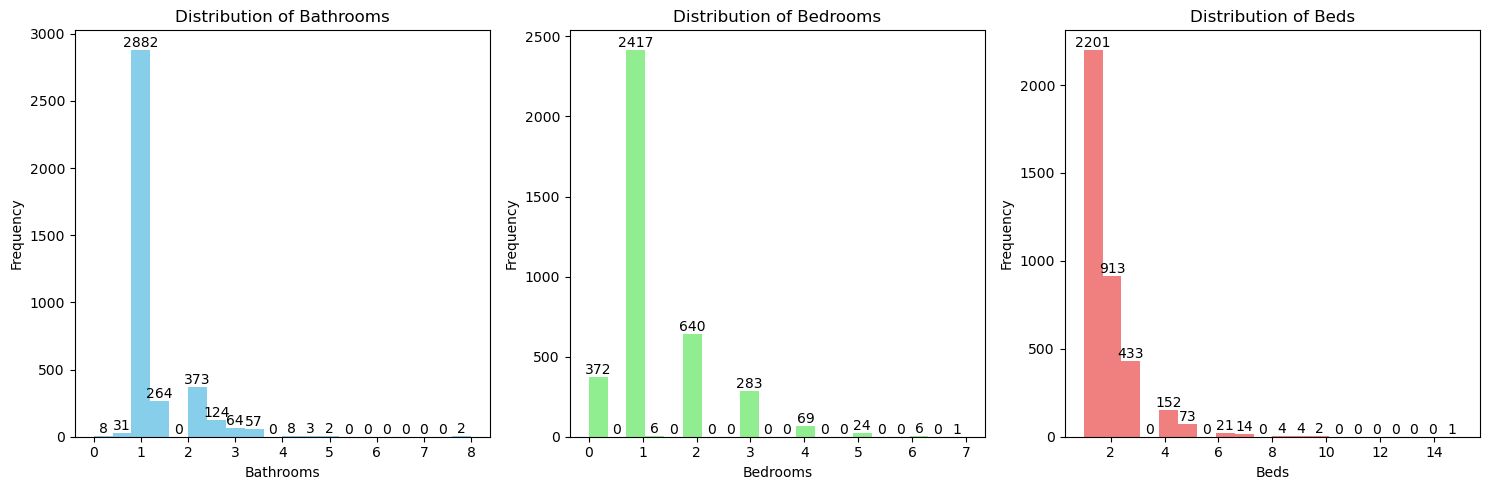

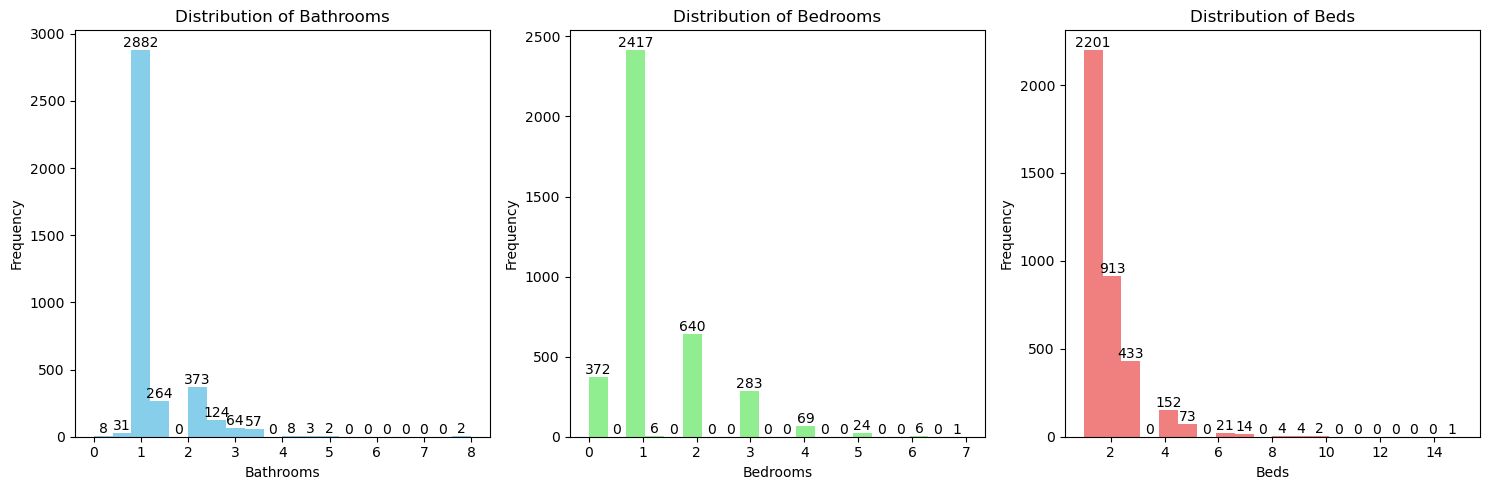

In [15]:
import matplotlib.pyplot as plt

# Create subplots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for each histogram
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Plot histograms for bathrooms, bedrooms, and beds
for i, col in enumerate(['bathrooms', 'bedrooms', 'beds']):
    ax = axes[i]
    ax.hist(lis[col], bins=20, color=colors[i])  # Use the corresponding color for each histogram
    ax.set_title(f'Distribution of {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Frequency')

    # Annotate each bar with its count
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(),
                f'{int(rect.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


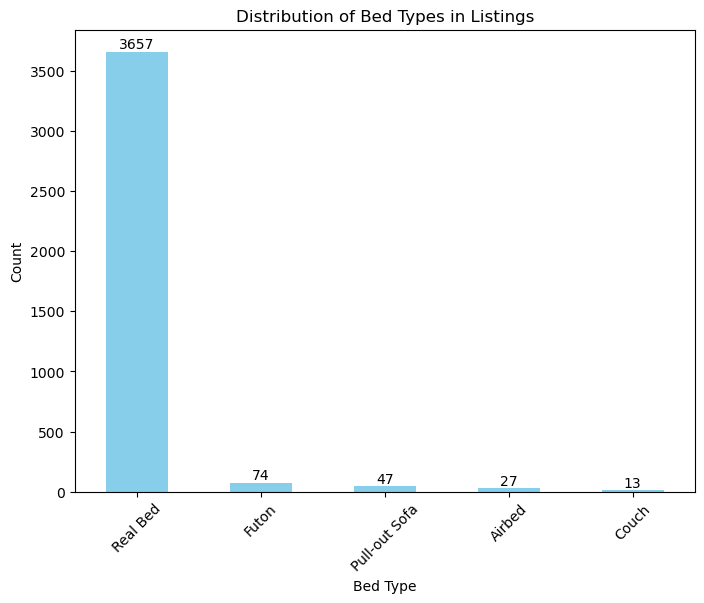

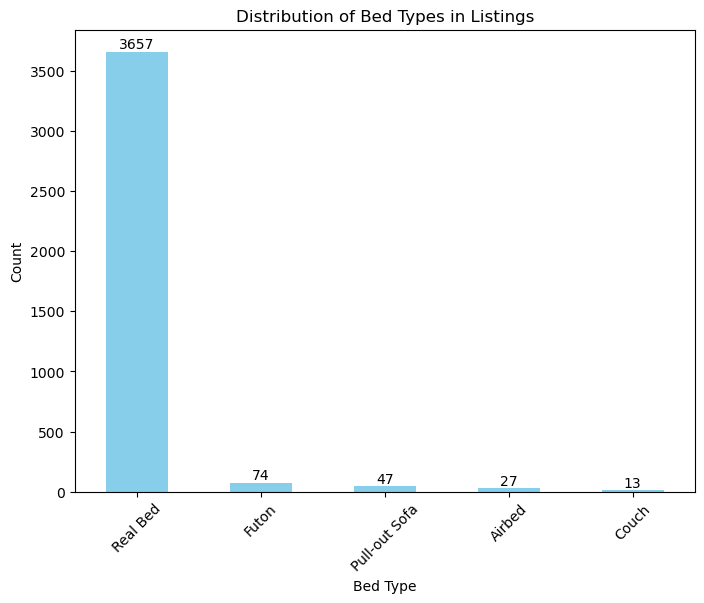

In [16]:
bed_type_counts = lis['bed_type'].value_counts()

# Plotting a bar chart with counts
plt.figure(figsize=(8, 6))
bed_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Bed Type')
plt.ylabel('Count')
plt.title('Distribution of Bed Types in Listings')
plt.xticks(rotation=45)

# Annotate each bar with its count
for i, count in enumerate(bed_type_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

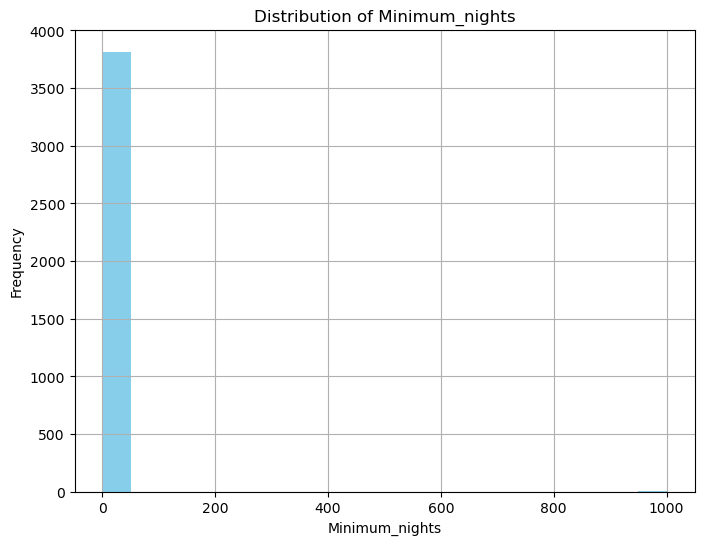

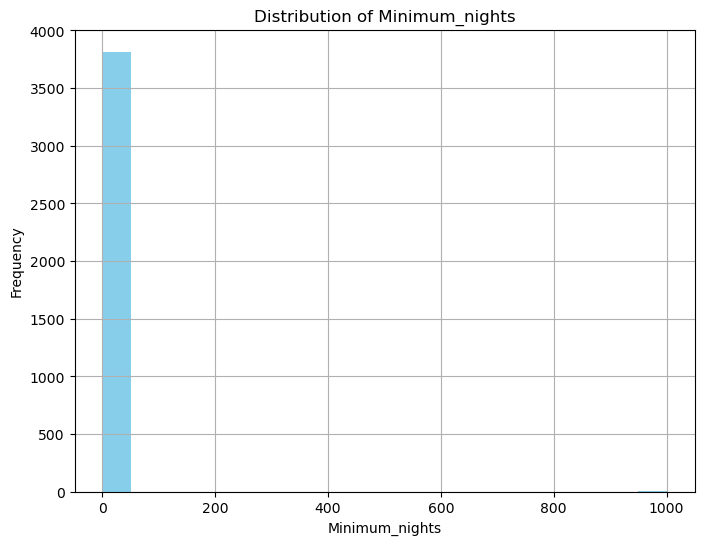

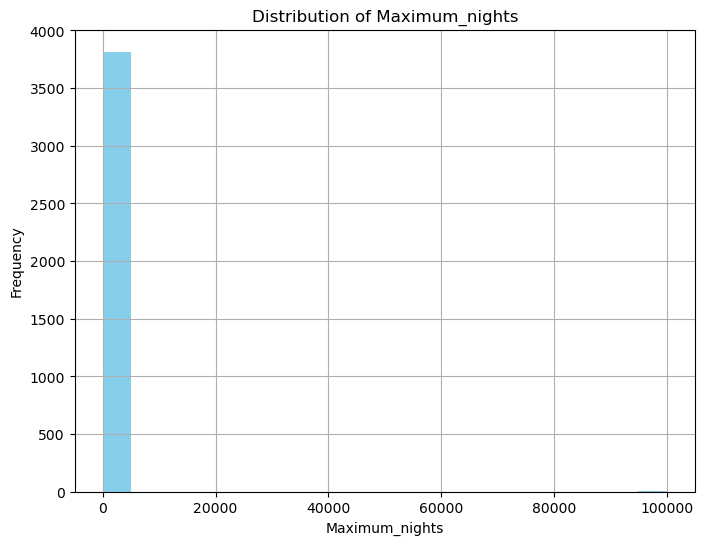

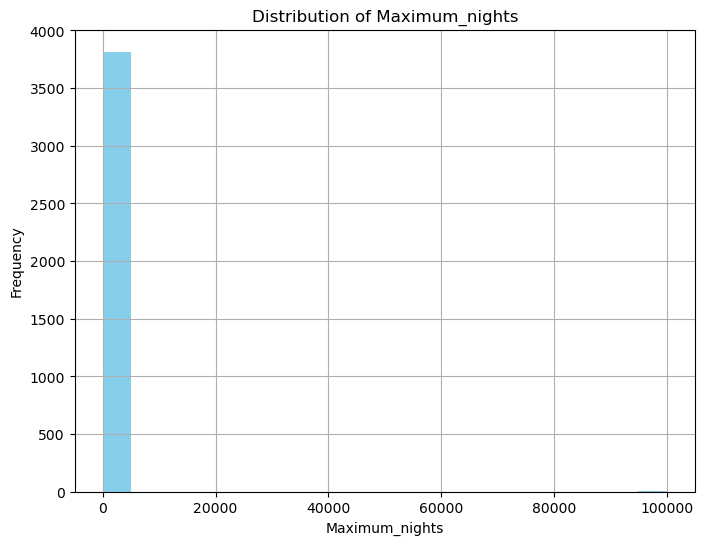

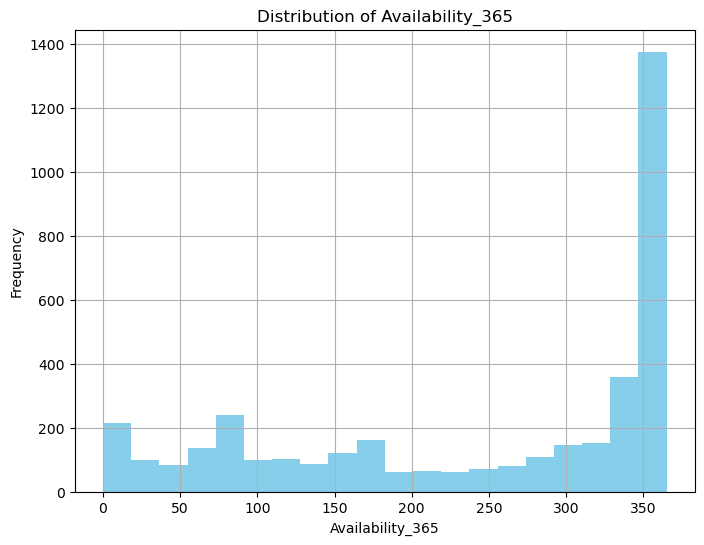

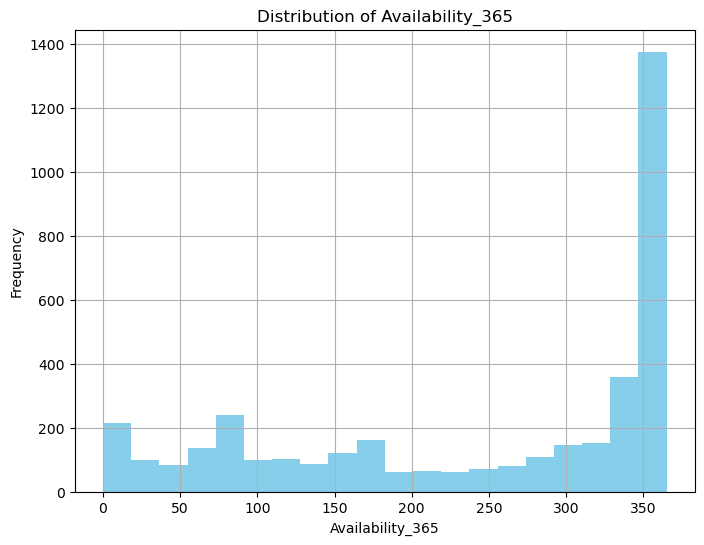

In [17]:
import matplotlib.pyplot as plt

# Define the numerical variables to analyze
numerical_vars = [ 'minimum_nights', 'maximum_nights', 'availability_365']

# Plot histograms for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(lis[var], bins=20, color='skyblue')
    plt.xlabel(var.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var.capitalize()}')
    plt.grid(True)
    plt.show()


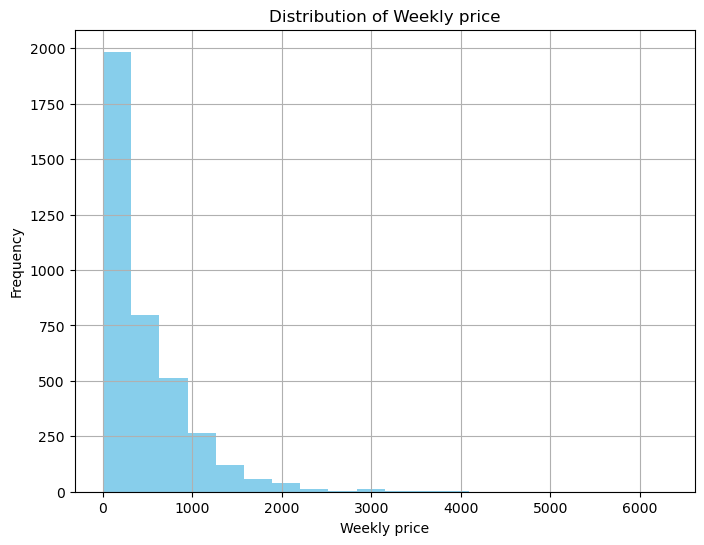

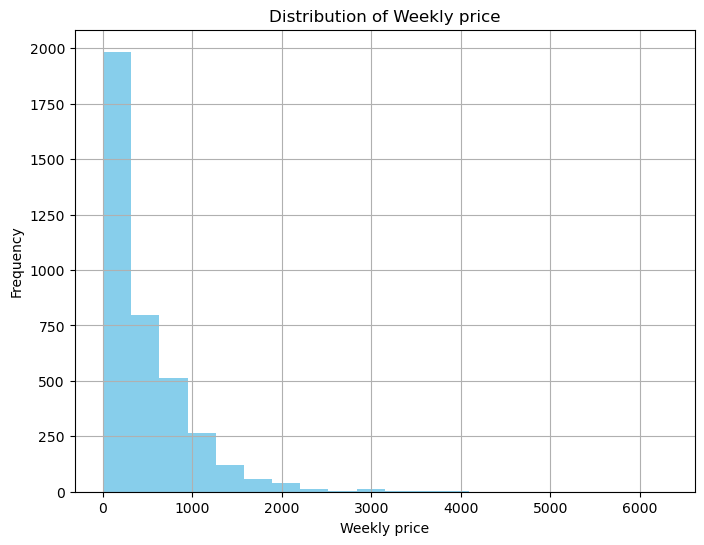

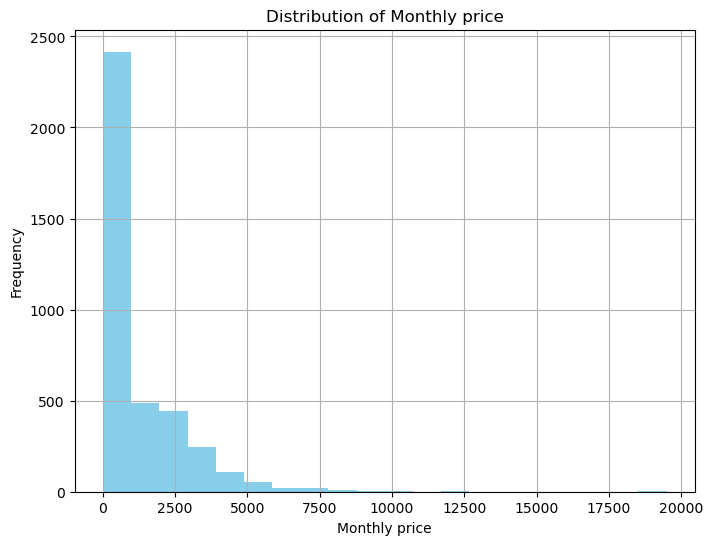

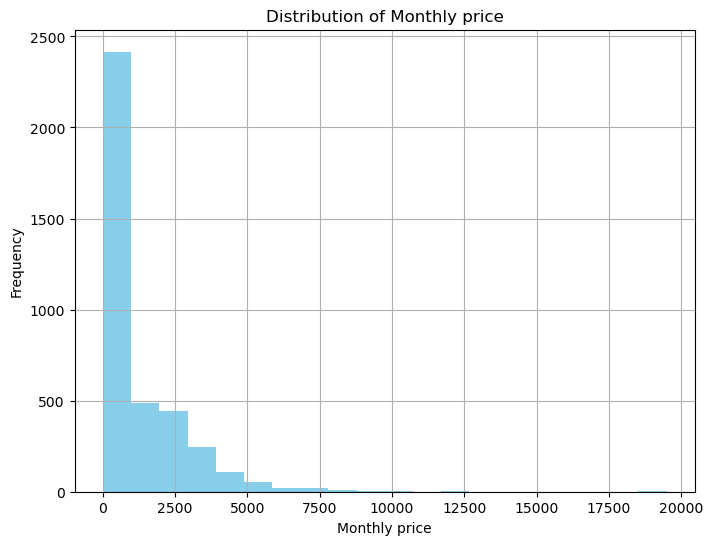

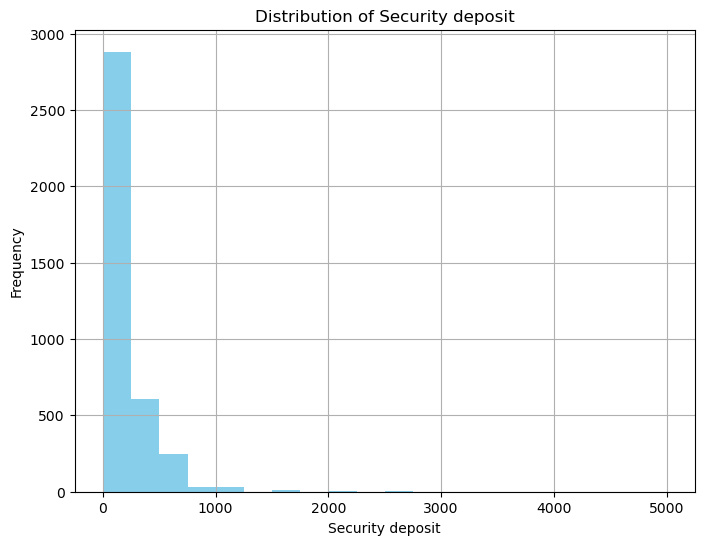

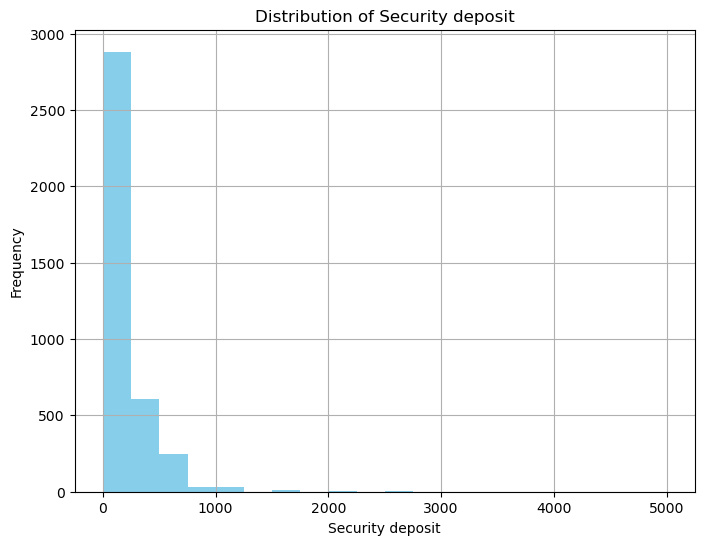

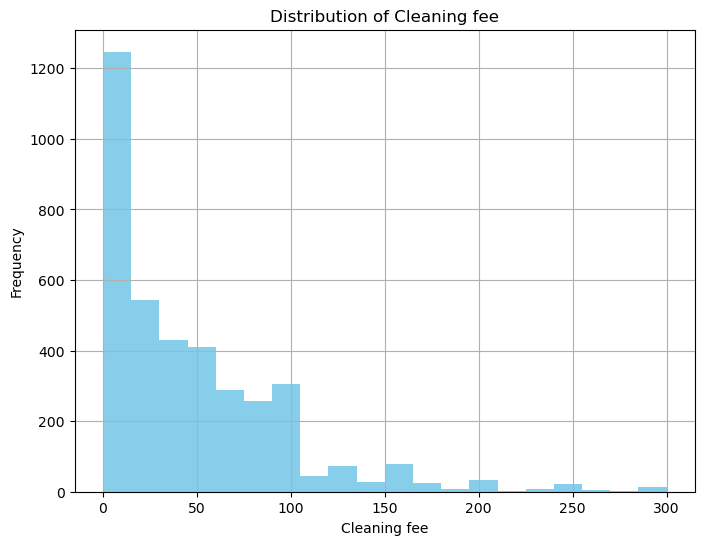

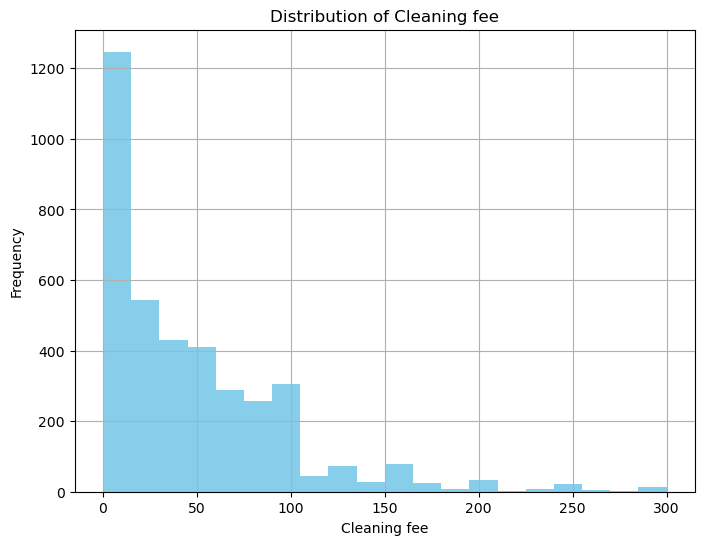

In [18]:
import matplotlib.pyplot as plt

# Define the numerical variables to analyze
numerical_vars = ['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

# Plot histograms for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(lis[var].dropna(), bins=20, color='skyblue')
    plt.xlabel(var.replace('_', ' ').capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var.replace("_", " ").capitalize()}')
    plt.grid(True)
    plt.show()


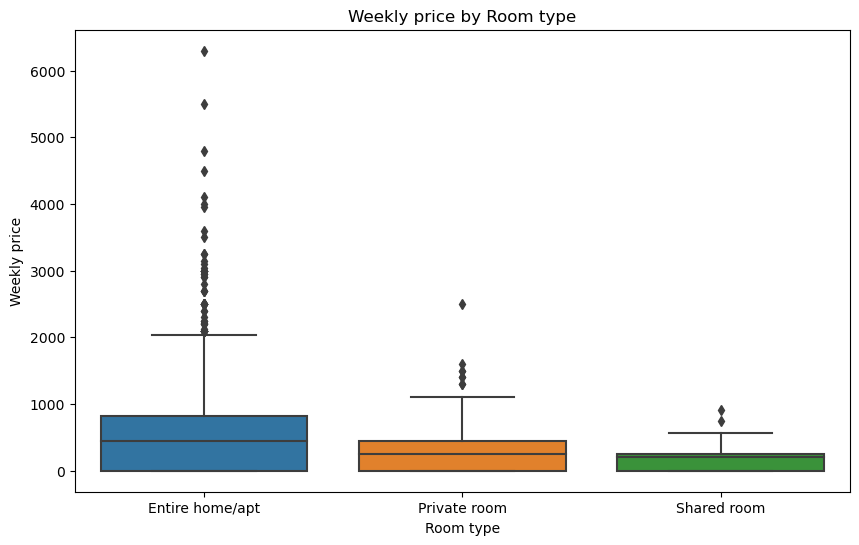

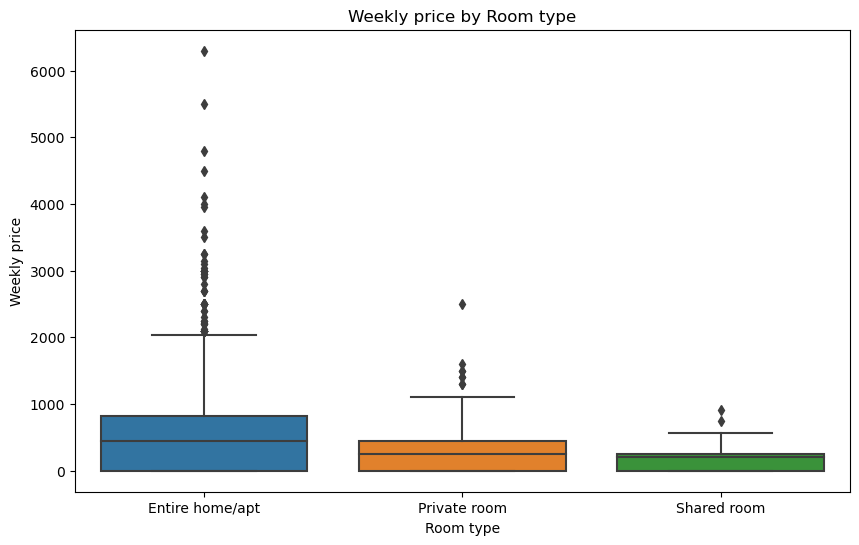

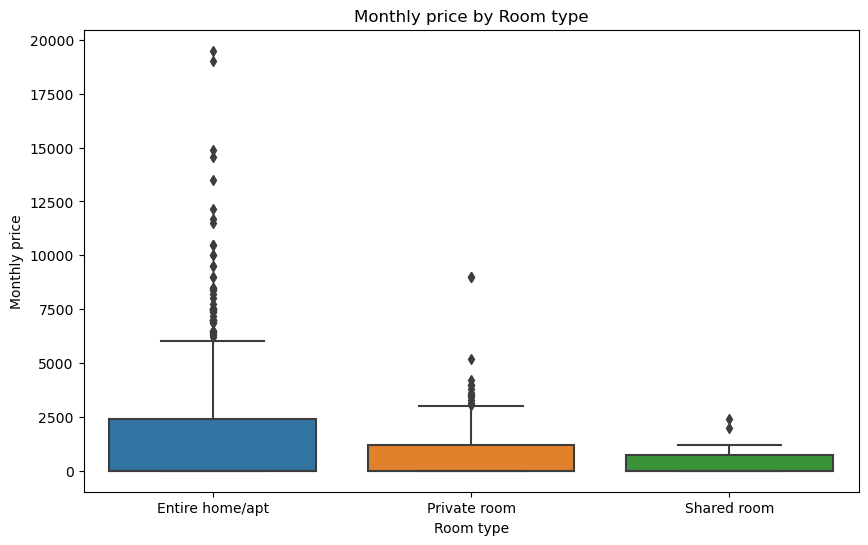

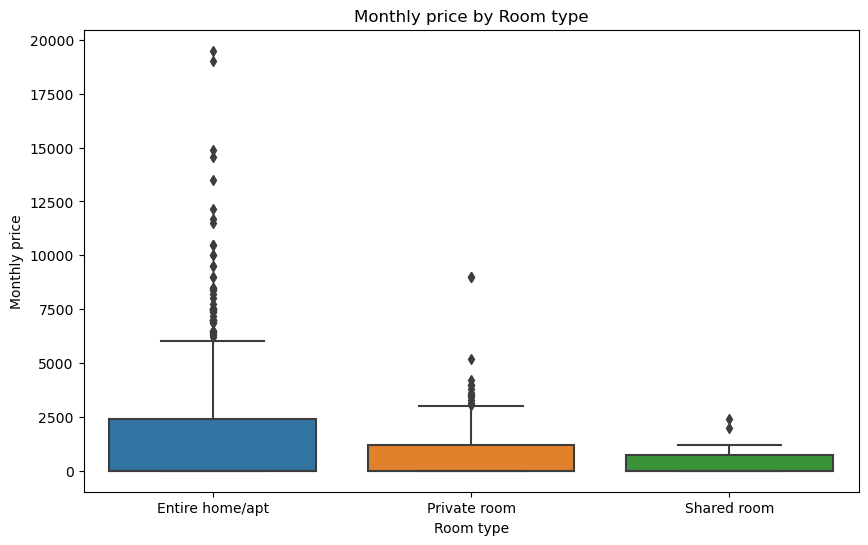

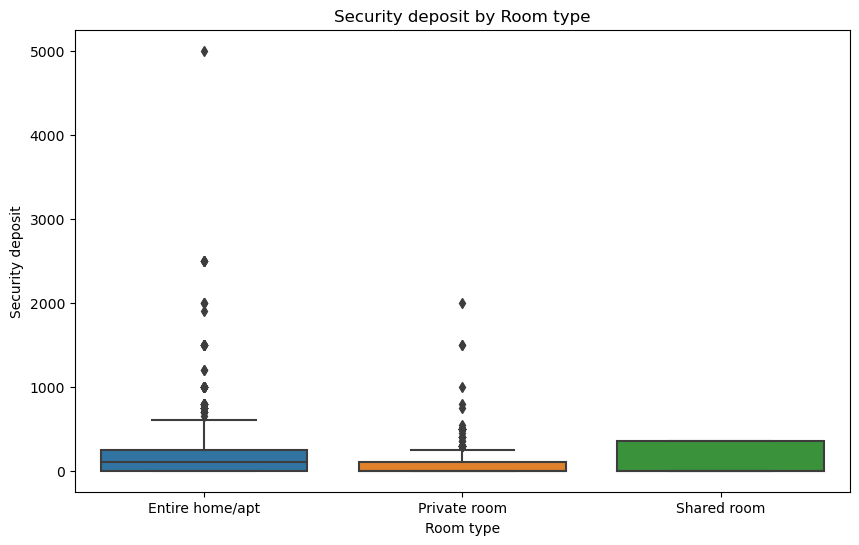

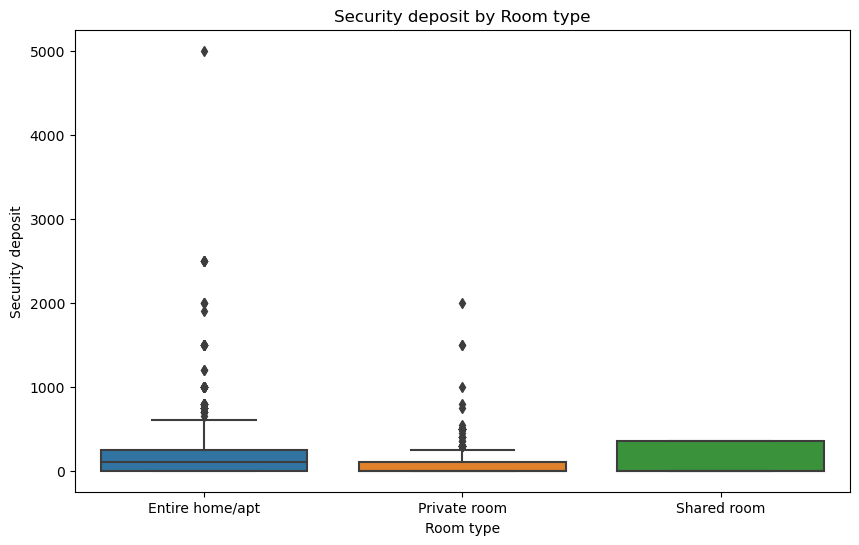

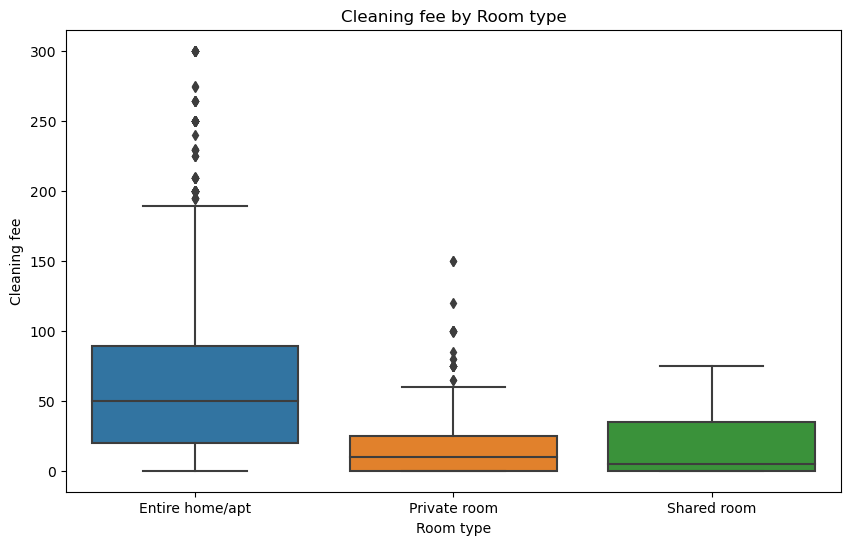

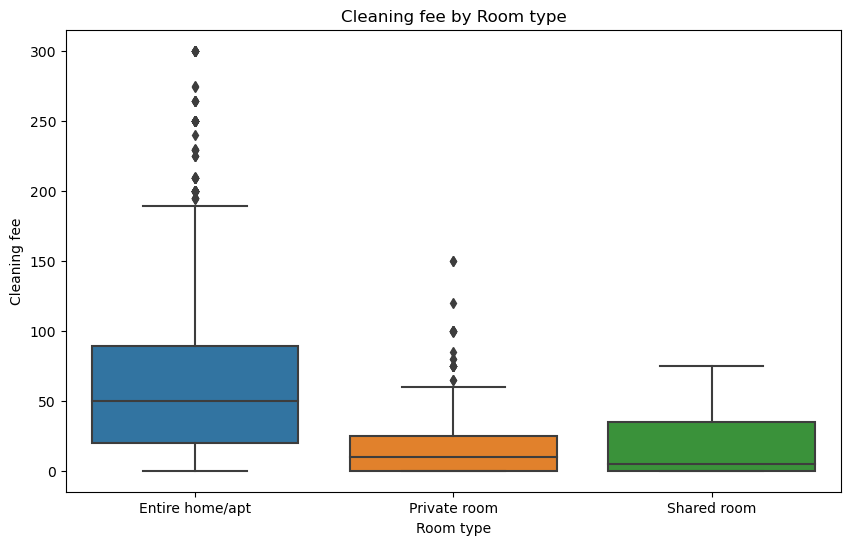

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical variables and the column to combine with
numerical_vars = ['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']
combine_with = 'room_type'

# Plot boxplots for each numerical variable grouped by room type
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=combine_with, y=var, data=lis)
    plt.xlabel(combine_with.replace('_', ' ').capitalize())
    plt.ylabel(var.replace('_', ' ').capitalize())
    plt.title(f'{var.replace("_", " ").capitalize()} by {combine_with.replace("_", " ").capitalize()}')
    plt.show()


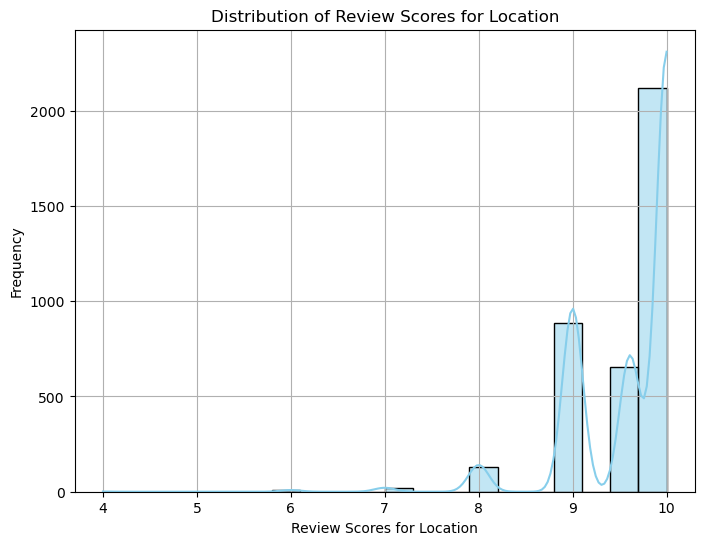

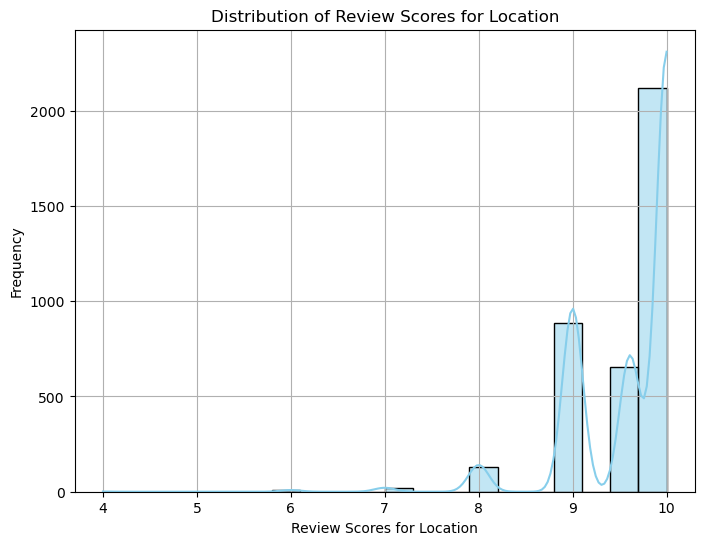

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram for the distribution of review scores for location
plt.figure(figsize=(8, 6))
sns.histplot(lis['review_scores_location'], bins=20, kde=True, color='skyblue')
plt.xlabel('Review Scores for Location')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores for Location')
plt.grid(True)
plt.show()
